<a href="https://colab.research.google.com/github/vikasv123/Heart-Attack-Prediction/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data

In [ ]:
data=pd.read_csv(r"/content/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Understanding the Data

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
# About DataSet

age : Age of the person

sex : Gender of the person

cp : Chest Pain type chest pain type

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

thalachh: maximum heart rate achieved

exng : exercise induced angina (1 = yes; 0 = no)

oldpeak : Previous peak

slp : Slope

caa : number of major vessels (0-3)

thall : Thal rate

output : Target variable

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape

(303, 14)

# Checking missing values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Data Analysis And Visualization

## i) Univariate Analysis

1    165
0    138
Name: output, dtype: int64


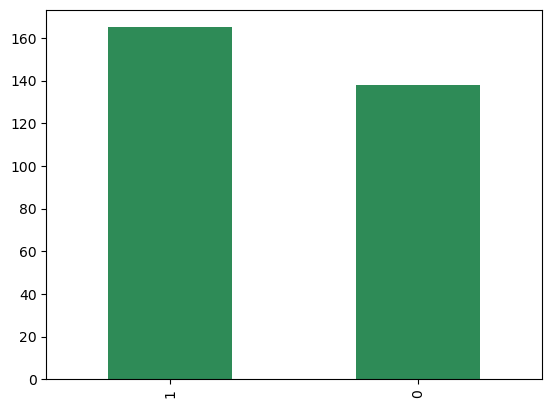

In [ ]:
# Target Variable
print(data["output"].value_counts())
data["output"].value_counts().plot.bar(color="seagreen")
plt.show()

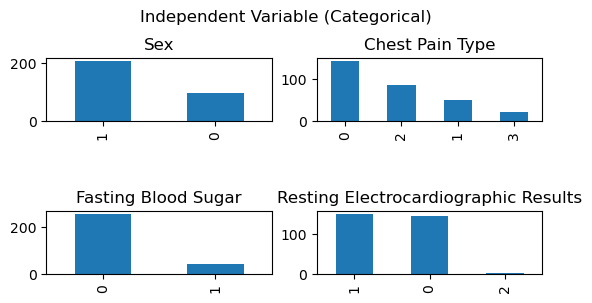

In [ ]:
# Independent Variable (Categorical)
plt.suptitle("Independent Variable (Categorical)")

plt.subplot(5,2,1)
data["sex"].value_counts().plot.bar(color="")
plt.title("Sex")

plt.subplot(5,2,2)
data["cp"].value_counts().plot.bar()
plt.title("Chest Pain Type")

plt.subplot(5,2,5)
data["fbs"].value_counts().plot.bar()
plt.title("Fasting Blood Sugar")

plt.subplot(5,2,6)
data["restecg"].value_counts().plot.bar()
plt.title("Resting Electrocardiographic Results")


plt.show()


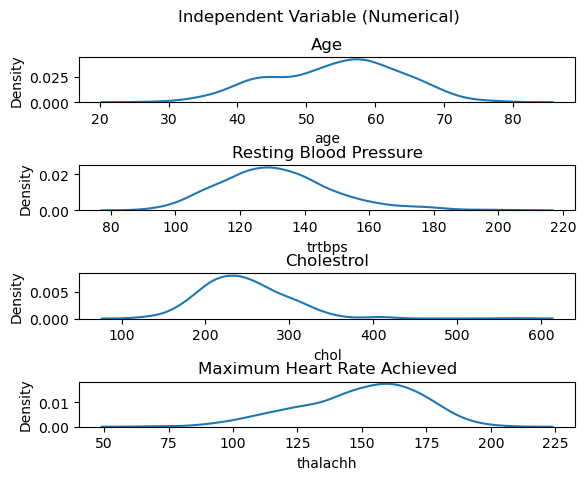

In [ ]:
# Independent Variable (Numerical)
plt.suptitle("Independent Variable (Numerical)")
plt.subplot(7,1,1)
sns.kdeplot(data["age"])
plt.title("Age")
plt.subplot(7,1,3)
sns.kdeplot(data["trtbps"])
plt.title("Resting Blood Pressure")
plt.subplot(7,1,5)
sns.kdeplot(data["chol"])
plt.title("Cholestrol")
plt.subplot(7,1,7)
sns.kdeplot(data["thalachh"])
plt.title("Maximum Heart Rate Achieved")
plt.show()

## ii) Bivariate Analysis

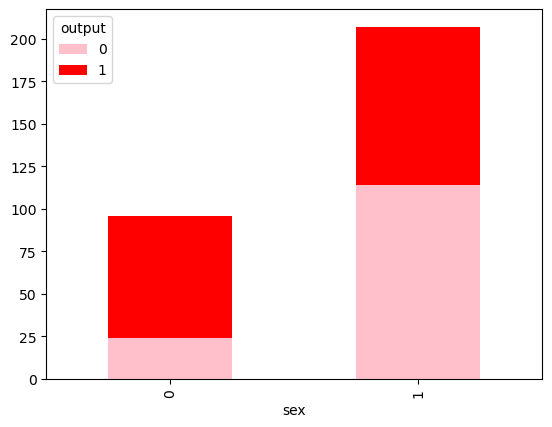

In [ ]:
# Categorical Independent Variable vs Target Variable

data.groupby('sex')['output'].value_counts().unstack().plot(kind='bar',stacked=True,color=["pink","red"])
plt.show()

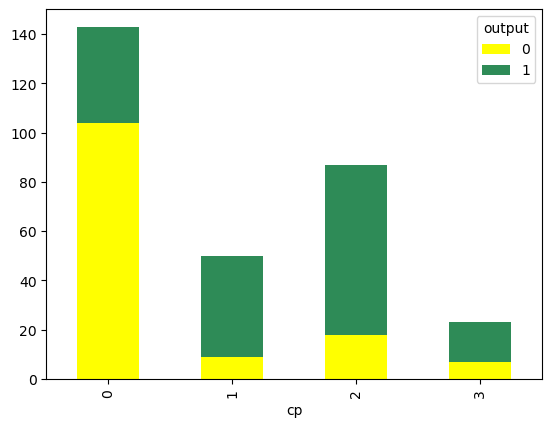

In [ ]:
data.groupby('cp')['output'].value_counts().unstack().plot(kind='bar',stacked=True,color=["yellow","seagreen"])
plt.show()

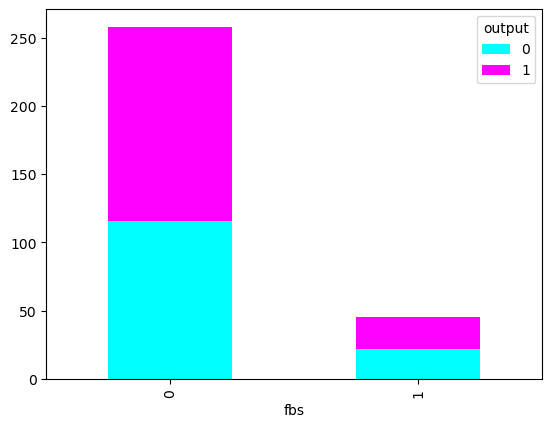

In [ ]:
data.groupby('fbs')['output'].value_counts().unstack().plot(kind='bar',stacked=True,color=["cyan","magenta"])
plt.show()


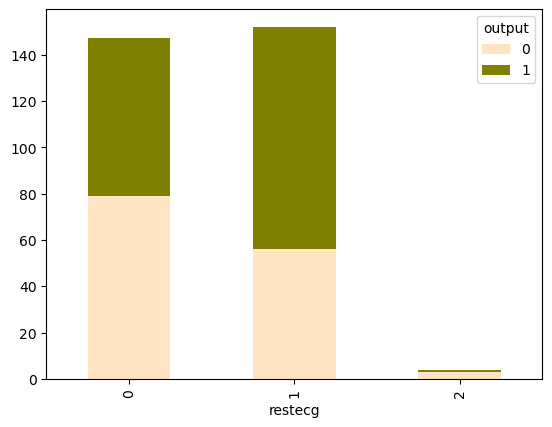

In [ ]:
data.groupby('restecg')['output'].value_counts().unstack().plot(kind='bar',stacked=True,color=["bisque","olive"])
plt.show()

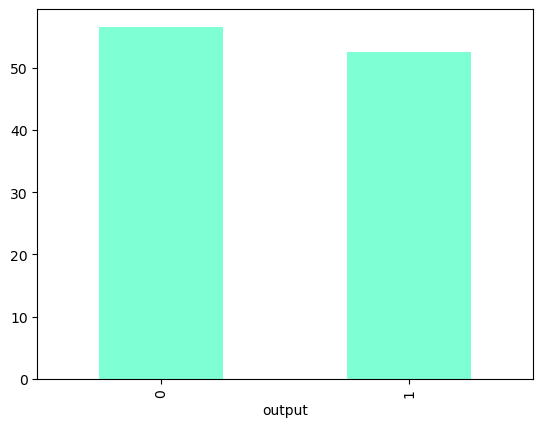

In [ ]:
# Numerical Independent Variable vs Target Variable

data.groupby('output')['age'].mean().plot(kind='bar',color="aquamarine")
plt.show()

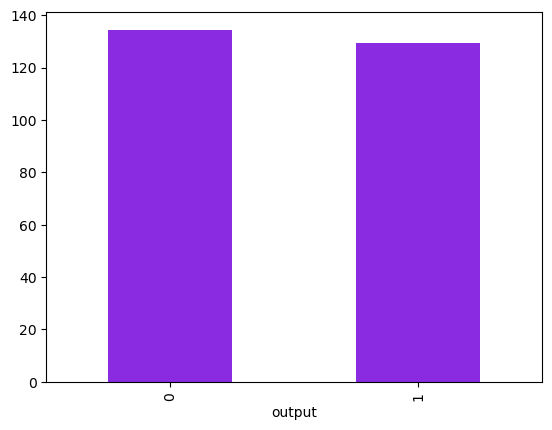

In [ ]:
data.groupby('output')['trtbps'].mean().plot(kind='bar',color="blueviolet")
plt.show()

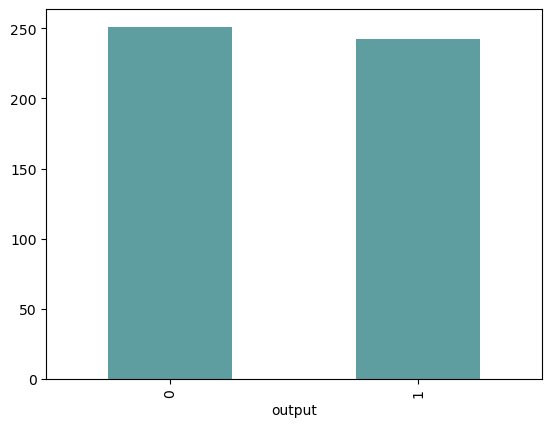

In [ ]:
data.groupby('output')['chol'].mean().plot(kind='bar',color="cadetblue")
plt.show()

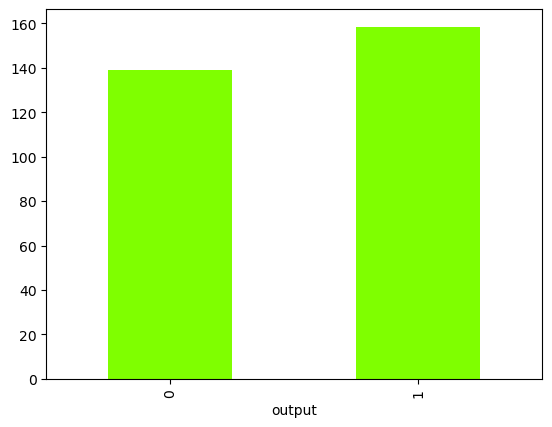

In [ ]:
data.groupby('output')['thalachh'].mean().plot(kind='bar',color="chartreuse")
plt.show()

In [ ]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


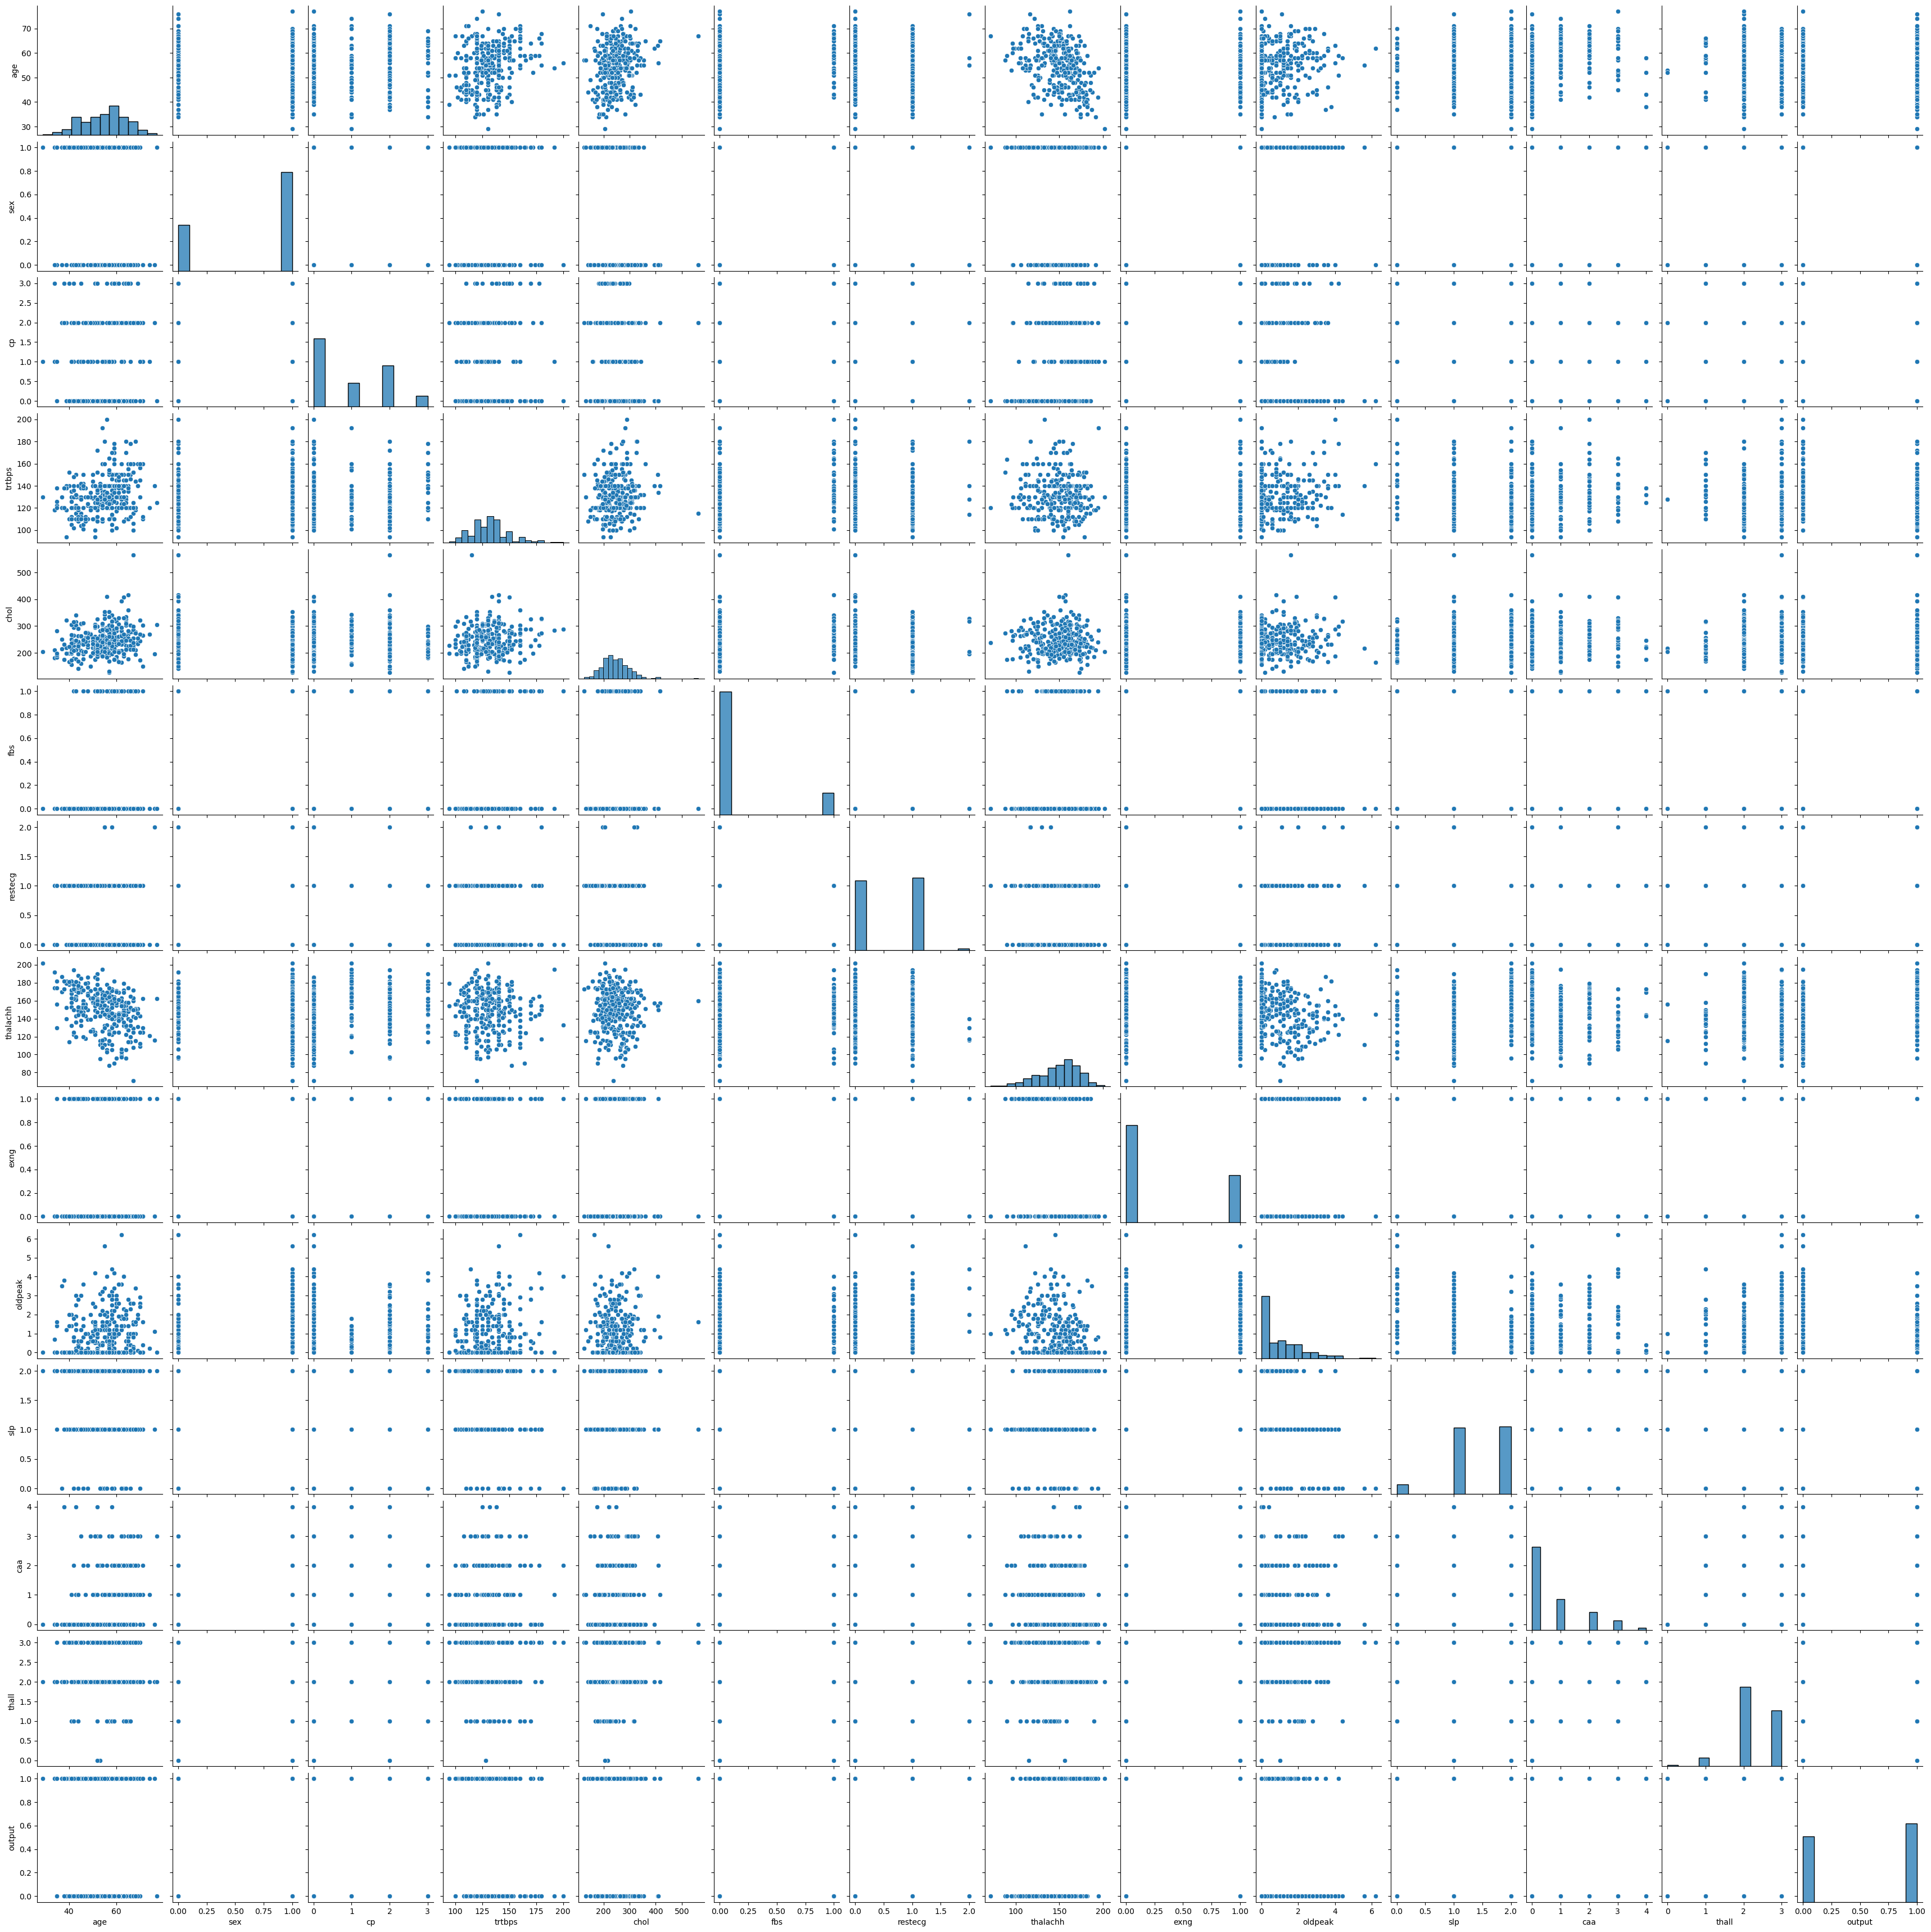

In [ ]:
sns.pairplot(data)
plt.show()

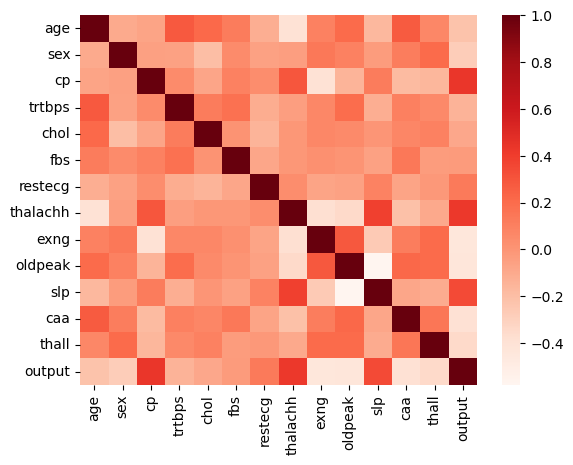

In [ ]:
matrix=data.corr()
sns.heatmap(matrix,cmap="Reds")
plt.show()

# Convert Dataset into Array

In [ ]:
# convert dataset into array
data=data.values
data

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

# Split the data

In [ ]:
x=data[:,:8]
y=data[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,shuffle=True, random_state=42)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)


x_train :  (242, 8)
y_train :  (242,)
x_test :  (61, 8)
y_test :  (61,)


# Highest Accuracy using Different Models 

## i) LogisticRegression

In [ ]:
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction1=model.predict(x_test)
prediction1

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
accuracy1=(accuracy_score(y_test,prediction1))*100
print(accuracy1,"%")

85.24590163934425 %


[[27  2]
 [ 7 25]]


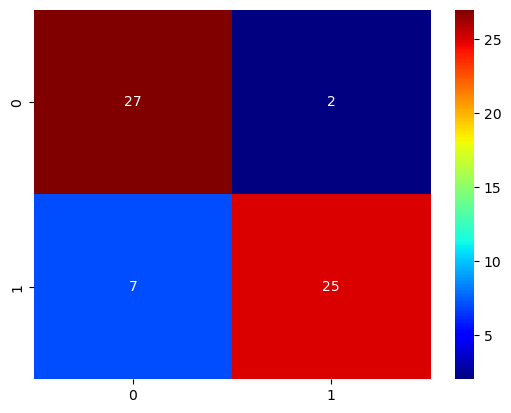

In [ ]:
confusion1=confusion_matrix(y_test,prediction1)
print(confusion1)
sns.heatmap(confusion1, cmap="jet", annot=True)
plt.show()

In [ ]:
classification1=classification_report(y_test,prediction1)
classification1

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.93      0.86        29\n         1.0       0.93      0.78      0.85        32\n\n    accuracy                           0.85        61\n   macro avg       0.86      0.86      0.85        61\nweighted avg       0.86      0.85      0.85        61\n'

## ii) Support vector machine

In [ ]:
# from sklearn import svm
# from sklearn.svm import SVC

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
prediction2=model.predict(x_test)
prediction2

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [ ]:
accuracy2=(accuracy_score(y_test,prediction2))*100
print(accuracy2,"%")

70.49180327868852 %


[[15 14]
 [ 4 28]]


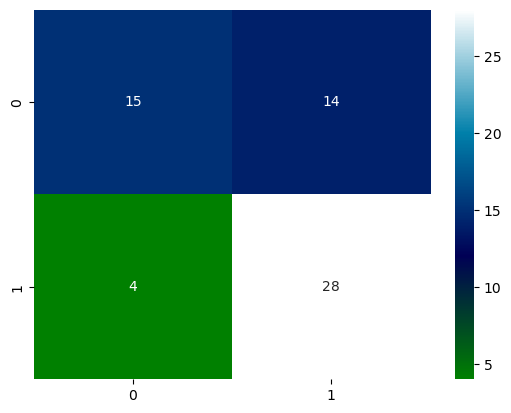

In [ ]:
confusion2=confusion_matrix(y_test,prediction2)
print(confusion2)
sns.heatmap(confusion2, cmap="ocean", annot=True)
plt.show()

In [ ]:
classification2=classification_report(y_test,prediction2)
classification2

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.52      0.62        29\n         1.0       0.67      0.88      0.76        32\n\n    accuracy                           0.70        61\n   macro avg       0.73      0.70      0.69        61\nweighted avg       0.73      0.70      0.69        61\n'

## iii) DecisionTreeClassifier

In [ ]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction3=model.predict(x_test)
prediction3

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [ ]:
accuracy3=(accuracy_score(y_test,prediction3))*100
print(accuracy3,"%")

77.04918032786885 %


[[23  6]
 [ 8 24]]


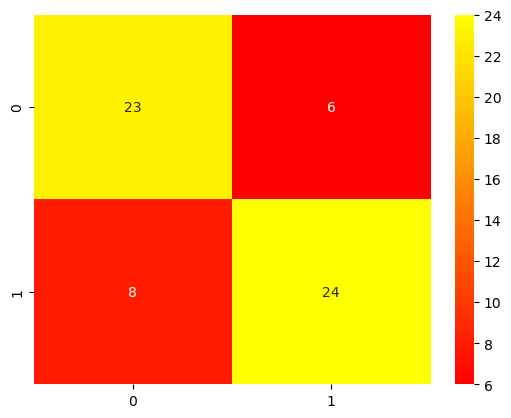

In [ ]:
confusion3=confusion_matrix(y_test,prediction3)
print(confusion3)
sns.heatmap(confusion3, cmap="autumn", annot=True)
plt.show()

In [ ]:
classification3=classification_report(y_test,prediction3)
classification3

'              precision    recall  f1-score   support\n\n         0.0       0.74      0.79      0.77        29\n         1.0       0.80      0.75      0.77        32\n\n    accuracy                           0.77        61\n   macro avg       0.77      0.77      0.77        61\nweighted avg       0.77      0.77      0.77        61\n'

## iv) KNeighborsClassifier 

In [ ]:
# from sklearn import neighbors
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction4=model.predict(x_test)
prediction4

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [ ]:
accuracy4=(accuracy_score(y_test,prediction4))*100
print(accuracy4,"%")

68.85245901639344 %


[[18 11]
 [ 8 24]]


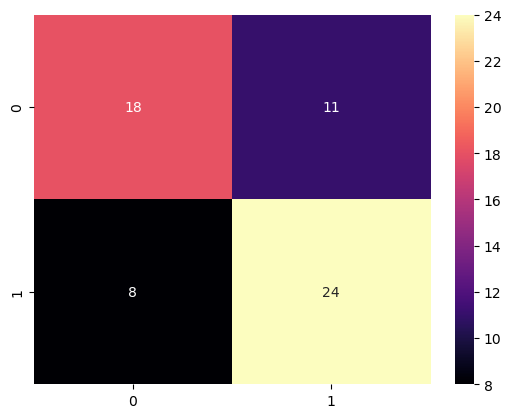

In [ ]:
confusion4=confusion_matrix(y_test,prediction4)
print(confusion4)
sns.heatmap(confusion4, cmap="magma", annot=True)
plt.show()

In [ ]:
classification4=classification_report(y_test,prediction4)
classification4

'              precision    recall  f1-score   support\n\n         0.0       0.69      0.62      0.65        29\n         1.0       0.69      0.75      0.72        32\n\n    accuracy                           0.69        61\n   macro avg       0.69      0.69      0.69        61\nweighted avg       0.69      0.69      0.69        61\n'

## v) Random Forest

In [ ]:
# from sklearn import ensemble
# from sklearn.ensemble import RandomForestClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
prediction5 = model.predict(x_test)
prediction5

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0.])

In [ ]:
accuracy5=(accuracy_score(y_test,prediction5))*100
print(accuracy5,"%")

81.9672131147541 %


[[26  3]
 [ 8 24]]


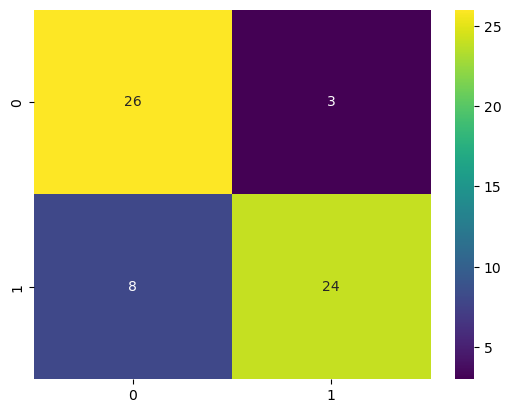

In [ ]:
confusion5=confusion_matrix(y_test,prediction5)
print(confusion5)
sns.heatmap(confusion5, cmap="viridis", annot=True)
plt.show()

In [ ]:
classification5=classification_report(y_test,prediction5)
classification5

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.90      0.83        29\n         1.0       0.89      0.75      0.81        32\n\n    accuracy                           0.82        61\n   macro avg       0.83      0.82      0.82        61\nweighted avg       0.83      0.82      0.82        61\n'

## vi) Naive Bayes

In [ ]:
# from sklearn import naive_bayes
# from sklearn.naive_bayes import GaussianNB

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

prediction6=model.predict(x_test)
prediction6

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
accuracy6=(accuracy_score(y_test,prediction6))*100
print(accuracy6,"%")

85.24590163934425 %


[[26  3]
 [ 6 26]]


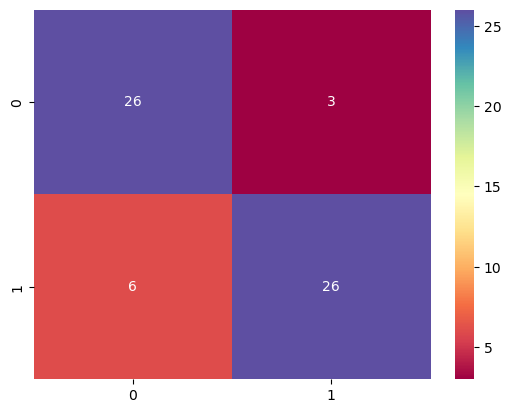

In [ ]:
confusion6=confusion_matrix(y_test,prediction6)
print(confusion6)
sns.heatmap(confusion6, cmap="Spectral", annot=True)
plt.show()

In [ ]:
classification6=classification_report(y_test,prediction6)
classification6

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.90      0.85        29\n         1.0       0.90      0.81      0.85        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.86      0.85      0.85        61\n'

# Highest Accuracy

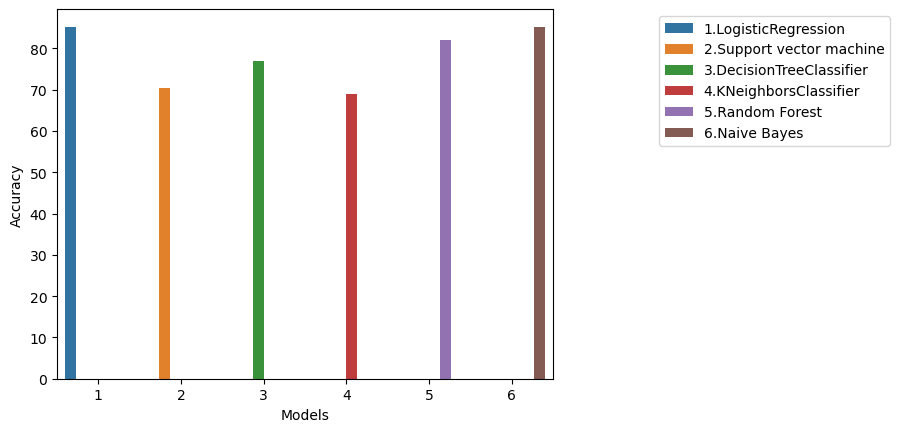

85.24590163934425


In [ ]:
Highest_accuracy=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
num=[1,2,3,4,5,6]
Models=["1.LogisticRegression","2.Support vector machine","3.DecisionTreeClassifier","4.KNeighborsClassifier",
        "5.Random Forest","6.Naive Bayes"]
a=sns.barplot(x=num,y=Highest_accuracy,hue=Models)
a.set(xlabel="Models",ylabel="Accuracy")
a.legend(bbox_to_anchor= (1.2,1))
plt.show()
print(max(Highest_accuracy))

In [ ]:
from tkinter import *
base=Tk()
base.geometry("1920x1080")
c=Canvas(base,bg="black",width="1920",height="1080")
c.pack()

"""
Age of the person

sex : Gender of the person

cp : Chest Pain type chest pain type

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

thalachh: maximum heart rate achieved
"""

title=Label(base,text="Prediction Of HeartAttack",bg="black",fg="white",font=("Helvetica", 30)).place(x=550,y=10)   

age=Label(base,text="Age of the person :",bg="black",fg="white",font=(10)).place(x=30,y=130)
sex=Label(base,text="Gender of the person :",bg="black",fg="white",font=(10)).place(x=30,y=170)
cp=Label(base,text="Chest Pain type :",bg="black",fg="white",font=(10)).place(x=30,y=210)
trtbps=Label(base,text="Resting blood pressure (in mm Hg) :",bg="black",fg="white",font=(10)).place(x=30,y=250)
chol=Label(base,text="Cholestoral in mg/dl fetched via BMI sensor :",bg="black",fg="white",font=(10)).place(x=30,y=290)
fbs=Label(base,text="Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) :",bg="black",fg="white",font=(10)).place(x=30,y=330)
restecg=Label(base,text="Resting ElectroCardioGraphic results :",bg="black",fg="white",font=(10)).place(x=30,y=370)
thalachh=Label(base,text="Maximum heart rate achieved :",bg="black",fg="white",font=(10)).place(x=30,y=410)

e1=Entry(base).place(x=700,y=130,width=500,height=20)
e2=Entry(base).place(x=700,y=170,width=500,height=20)
e3=Entry(base).place(x=700,y=210,width=500,height=20)
e4=Entry(base).place(x=700,y=250,width=500,height=20)
e5=Entry(base).place(x=700,y=290,width=500,height=20)
e6=Entry(base).place(x=700,y=330,width=500,height=20)
e7=Entry(base).place(x=700,y=370,width=500,height=20)
e8=Entry(base).place(x=700,y=410,width=500,height=20)

base.mainloop()